# 3.1 Model: Data Preprocessing Pipeline

Load data and check

In [7]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '../../2_data_acquisition_understanding/data/processed/reduced_features.csv'
df = pd.read_csv(file_path)


In [8]:
# Separate features and target
X = df.drop(columns=['diagnosis_binary'])  # Drop target column for feature processing
y = df['diagnosis_binary']  # Target variable

In [5]:
X.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [441]:
(X.head())

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2364,0.07678


In [443]:
y.head(100)

0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    0
97    0
98    0
99    1
Name: diagnosis_binary, Length: 100, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [447]:
y_test.head(20)

204    0
70     1
131    1
431    0
540    0
567    1
369    1
29     1
81     0
477    0
457    0
167    1
165    0
329    1
527    0
83     1
511    0
556    0
101    0
535    1
Name: diagnosis_binary, dtype: int64

In [445]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 17), (455,), (114, 17), (114,))

 1. Preprocessing

In [11]:
# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()  # Replace with any other categorical columns if present

# Define transformations for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),  # Fill missing values with median
    ('scaler', StandardScaler())                   # Scale features
])

# Define transformations for categorical features (e.g., diagnosis if used as a feature)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', add_indicator=True)),  # Fill missing values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode
])

# Combine preprocessing steps using ColumnTransformer
data_pipeline = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_columns),
        ('categorical', categorical_transformer, categorical_columns)
    ])

# Define the full pipeline
feature_pipeline = Pipeline(steps=[
    ('preprocess', data_pipeline)
])

# 3.2 Choosing Model

For this Classification task, there are multiple possible Model candidates. To get a easy overview I will use Pycaret to test these candidates in a simple manner

In [9]:

#!pip install pycaret

file_path = '../../2_data_acquisition_understanding/data/processed/reduced_features.csv'
df = pd.read_csv(file_path)

from pycaret.classification import *

experiment = setup(
    data=df,
    target='diagnosis_binary',
    session_id=42)

# Compare multiple models to find the best one
best_model = compare_models(
    include=['lr', 'dt', 'rf', 'gbc'],
    sort='Accuracy'
)
# Print the best model
print(best_model)


,Description,Value
0,Session id,42
1,Target,diagnosis_binary
2,Target type,Binary
3,Original data shape,"(569, 18)"
4,Transformed data shape,"(569, 18)"
5,Transformed train set shape,"(398, 18)"
6,Transformed test set shape,"(171, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:28:21
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9446,0.9868,0.9038,0.9460,0.9221,0.8792,0.8819,0.2100
gbc,Gradient Boosting Classifier,0.9346,0.9798,0.8910,0.9333,0.9102,0.8588,0.8609,0.2140
dt,Decision Tree Classifier,0.9095,0.9004,0.8648,0.8929,0.8767,0.8053,0.8076,0.1040
lr,Logistic Regression,0.9094,0.9570,0.8433,0.9098,0.8719,0.8022,0.8072,1.3690


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


## 3.2.1 Decision Tree Classifier

In [140]:

# Models decisions and their possible outcomes as a tree structure.
# Easy to interpret because each decision path is clear and traceable.
file_path = '../../2_data_acquisition_understanding/data/processed/reduced_features.csv'
df = pd.read_csv(file_path)

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
pca = PCA(n_components=6)
# new decision tree pipeline
dt_pipeline = Pipeline(steps=[
                    ('pca', pca),
                    ('model', dt)])


In [141]:
#fit pipeline with model
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=6)),
                ('model', DecisionTreeClassifier())])

In [142]:
#Predicting  the test set
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

y_pred = dt_pipeline.predict(X_test)
y_pred_proba = dt_pipeline.predict_proba(X_test)[:, 1]

#Computing the metrics

Accuracy = accuracy_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred_proba)
Recall = recall_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)

print(f"Accuracy: {Accuracy}")
print(f"AUC: {AUC}")
print(f"Recall: {Recall}")
print(f"Precision: {Precision}")
print(f"F1 Score: {F1}")

Accuracy: 0.8771929824561403
AUC: 0.8738945299705209
Recall: 0.8604651162790697
Precision: 0.8222222222222222
F1 Score: 0.8409090909090909


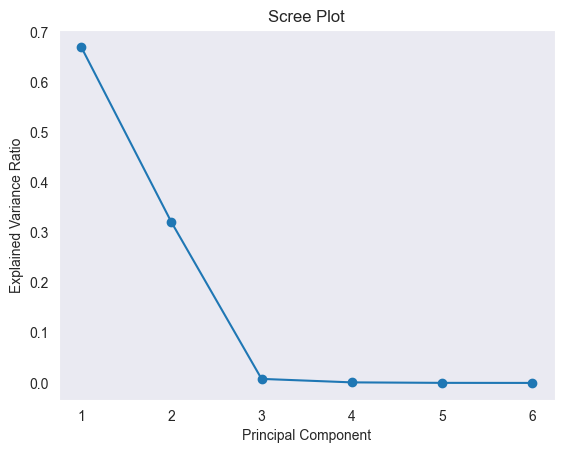

In [143]:
import matplotlib.pyplot as plt

# Fit PCA

pca.fit(X_train)

# Plot explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid()
plt.show()


In [104]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameter search space
param_distributions = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': randint(3, 20),
    'model__min_samples_split': randint(2, 30),
    'model__min_samples_leaf': randint(1, 10),
    'model__max_features': ['sqrt', 'log2', None],
    'model__class_weight': [None, 'balanced'],
    'model__splitter': ['best', 'random']
}

# Initialize RandomizedSearchCV for hyperparameter optimization
random_search = RandomizedSearchCV(
    estimator=dt_pipeline,  # Pipeline with decision tree and preprocessing steps
    param_distributions=param_distributions,  # Parameter space to search
    n_iter=1000,  # Number of parameter settings to test
    scoring='accuracy',  # Scoring metric for optimization (Accuracy)
    cv=5,  # Perform 5-fold cross-validation
    verbose= 1,  # Display progress and detailed output during training
    random_state=42,  # Set random state for reproducibility
    n_jobs=-1  # Use all available CPU cores for parallel computation
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best Params:", random_search.best_params_)

# Retrieve the best pipeline (optimized model) from RandomizedSearchCV
best_pipeline = random_search.best_estimator_

# Make predictions on the test set using the optimized model
y_pred = best_pipeline.predict(X_test)
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

Accuracy = accuracy_score(y_test, y_pred)  # Overall accuracy
AUC = roc_auc_score(y_test, y_pred_proba)  # Area under the ROC curve
Recall = recall_score(y_test, y_pred)  # Sensitivity/True positive rate
Precision = precision_score(y_test, y_pred)  # Precision (positive predictive value)
F1 = f1_score(y_test, y_pred)  # F1-score (harmonic mean of Precision and Recall)

# Print the evaluation metrics
print(f"Accuracy: {Accuracy}")
print(f"AUC: {AUC}")
print(f"Recall: {Recall}")
print(f"Precision: {Precision}")
print(f"F1 Score: {F1}")



Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Params: {'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 6, 'model__max_features': None, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6, 'model__splitter': 'best'}
Accuracy: 0.9385964912280702
AUC: 0.9408778250900753
Recall: 0.9302325581395349
Precision: 0.9090909090909091
F1 Score: 0.9195402298850575


--> Since the accuracy is not good enough this model candidate is out of scope!!!

In [105]:
# Save the pipeline and the model
from joblib import dump, load

dump(best_pipeline, '../models/dt_pipeline_no_pp.pkl')

['../models/dt_pipeline_no_pp.pkl']

## 3.2.2 Logistic Regression

In [63]:

# Models the probability of a binary outcome (e.g., "malignant" or "benign") as a function of the input features.

file_path = '../../2_data_acquisition_understanding/data/processed/reduced_features.csv'
df = pd.read_csv(file_path)

from sklearn.pipeline import Pipeline
lr = LogisticRegression()
pca = PCA(n_components=0.95)
# new decision tree pipeline
lr_pipeline = Pipeline(steps=[
                    #('preprocess', data_pipeline),
                    ('pca', pca),
                    ('model', lr)])

In [ ]:
lr_pipeline.fit(X_train, y_train)

In [66]:
#Predicting ion the test set
y_pred = lr_pipeline.predict(X_test)
y_pred_proba = lr_pipeline.predict_proba(X_test)[:, 1]

#Computing the metrics
Accuracy = accuracy_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred_proba)
Recall = recall_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)

print(f"Accuracy: {Accuracy}")
print(f"AUC: {AUC}")
print(f"Recall: {Recall}")
print(f"Precision: {Precision}")
print(f"F1 Score: {F1}")

Accuracy: 0.9122807017543859
AUC: 0.9744513593187029
Recall: 0.8604651162790697
Precision: 0.9024390243902439
F1 Score: 0.8809523809523809


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

# Define the parameter distributions for tuning
param_distributions = {
    'model__penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization type
    'model__C': uniform(0.01, 10),  # Regularization strength
    'model__solver': ['lbfgs', 'liblinear', 'saga'],  # Solvers for optimization
    'model__max_iter': [100, 200, 500],  # Number of iterations
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lr_pipeline,
    param_distributions=param_distributions,
    n_iter=250,  # Number of parameter combinations to test
    scoring='roc_auc',  # Use AUC as the evaluation metric
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Extract the best model
tuned_lr_pipeline = random_search.best_estimator_

# Print the best hyperparameters
print("Best Parameters:", random_search.best_params_)

# Use the tuned model for predictions
y_pred = tuned_lr_pipeline.predict(X_test)
y_pred_proba = tuned_lr_pipeline.predict_proba(X_test)[:, 1]

# Compute metrics
Accuracy = accuracy_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred_proba)
Recall = recall_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Tuned Accuracy: {Accuracy}")
print(f"Tuned AUC: {AUC}")
print(f"Tuned Recall: {Recall}")
print(f"Tuned Precision: {Precision}")
print(f"Tuned F1 Score: {F1}")


In [ ]:
tuned_lr_pipeline

In [70]:
# Save the pipeline and the model
from joblib import dump, load

dump(tuned_lr_pipeline, '../models/lr_pipeline.pkl')


['../models/lr_pipeline.pkl']

## 3.2.3 Random Forest Classifier

In [118]:

# An ensemble of decision trees that classifies using majority voting.
file_path = '../../2_data_acquisition_understanding/data/processed/reduced_features.csv'
df = pd.read_csv(file_path)

from sklearn.pipeline import Pipeline
rf = RandomForestClassifier()

# new decision tree pipeline
rf_pipeline = Pipeline(steps=[
                    #('preprocess', data_pipeline),
                    ('model', rf)])

In [119]:
rf_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=None, oob_score=False,
                                        random_state=None, verbose=0,
                                        warm_start=False))],
         verbose=False)

In [120]:
#Predicting ion the test set
y_pred = rf_pipeline.predict(X_test)
y_pred_proba = rf_pipeline.predict_proba(X_test)[:, 1]

#Computing the metrics
Accuracy = accuracy_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred_proba)
Recall = recall_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)

print(f"Accuracy: {Accuracy}")
print(f"AUC: {AUC}")
print(f"Recall: {Recall}")
print(f"Precision: {Precision}")
print(f"F1 Score: {F1}")

Accuracy: 0.956140350877193
AUC: 0.9918113331149688
Recall: 0.9302325581395349
Precision: 0.9523809523809523
F1 Score: 0.9411764705882353


In [121]:
# Define the parameter distributions for tuning
param_distributions = {
    'model__n_estimators': randint(10, 100),        # Number of trees
    'model__max_depth': randint(2, 15),            # Maximum depth of the trees
    'model__min_samples_split': randint(5, 20),    # Minimum samples for a split
    'model__min_samples_leaf': randint(3, 10),     # Minimum samples per leaf
    'model__max_features': ['sqrt', 'log2'], # Number of features considered for split
    'model__bootstrap': [True, False],             # Use bootstrap samples
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_distributions,
    n_iter=1000,  # Number of parameter combinations to test
    scoring='accuracy',  # Use AUC as the evaluation metric
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

random_search.fit(X_train, y_train)

# Extract the best model
tuned_rf_pipeline = random_search.best_estimator_


importances = tuned_rf_pipeline.named_steps['model'].feature_importances_
feature_names = X_train.columns
sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Print the best hyperparameters
print("Best Parameters:", random_search.best_params_)

# Use the tuned model for predictions
y_pred = tuned_rf_pipeline.predict(X_test)
y_pred_proba = tuned_rf_pipeline.predict_proba(X_test)[:, 1]

# Compute metrics
Accuracy = accuracy_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred_proba)
Recall = recall_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Tuned Accuracy: {Accuracy}")
print(f"Tuned AUC: {AUC}")
print(f"Tuned Recall: {Recall}")
print(f"Tuned Precision: {Precision}")
print(f"Tuned F1 Score: {F1}")


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Parameters: {'model__bootstrap': False, 'model__max_depth': 8, 'model__max_features': 'log2', 'model__min_samples_leaf': 3, 'model__min_samples_split': 9, 'model__n_estimators': 61}
Tuned Accuracy: 0.9649122807017544
Tuned AUC: 0.9911562397641663
Tuned Recall: 0.9534883720930233
Tuned Precision: 0.9534883720930233
Tuned F1 Score: 0.9534883720930233


In [122]:
from joblib import dump, load

dump(tuned_rf_pipeline, '../models/rf_pipeline_no_pp.pkl')

['../models/rf_pipeline_no_pp.pkl']

## 3.2.4 Gradient Boosting

In [26]:

# An ensemble of decision trees that classifies using majority voting.
file_path = '../../2_data_acquisition_understanding/data/processed/reduced_features.csv'
df = pd.read_csv(file_path)

from sklearn.pipeline import Pipeline
gb = GradientBoostingClassifier()

# new decision tree pipeline
gb_pipeline = Pipeline(steps=[
                    ('preprocess', data_pipeline),
                    ('model', gb)])

In [ ]:
gb_pipeline.fit(X_train, y_train)

In [28]:
#Predicting ion the test set
y_pred = gb_pipeline.predict(X_test)
y_pred_proba = gb_pipeline.predict_proba(X_test)[:, 1]

#Computing the metrics
Accuracy = accuracy_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred_proba)
Recall = recall_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)

print(f"Accuracy: {Accuracy}")
print(f"AUC: {AUC}")
print(f"Recall: {Recall}")
print(f"Precision: {Precision}")
print(f"F1 Score: {F1}")

Accuracy: 0.9473684210526315
AUC: 0.9885358663609565
Recall: 0.9302325581395349
Precision: 0.9302325581395349
F1 Score: 0.9302325581395349


In [29]:
# Define the parameter distributions for tuning
param_distributions = {
    'model__n_estimators': randint(50, 300),            # Number of boosting stages
    'model__learning_rate': uniform(0.01, 0.3),        # Learning rate shrinks contribution of each tree
    'model__max_depth': randint(3, 30),                # Maximum depth of individual estimators
    'model__min_samples_split': randint(2, 20),        # Minimum samples required to split a node
    'model__min_samples_leaf': randint(1, 10),         # Minimum samples required in a leaf node
    'model__subsample': uniform(0.5, 0.5),             # Fraction of samples to use for training each tree
    'model__max_features': ['sqrt', 'log2', None],     # Number of features to consider for splits
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_pipeline,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter combinations to test
    scoring='roc_auc',  # Use AUC as the evaluation metric
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

random_search.fit(X_train, y_train)

# Extract the best model
tuned_gb_pipeline = random_search.best_estimator_

# Print the best hyperparameters
print("Best Parameters:", random_search.best_params_)

# Use the tuned model for predictions
y_pred = tuned_gb_pipeline.predict(X_test)
y_pred_proba = tuned_gb_pipeline.predict_proba(X_test)[:, 1]

# Compute metrics
Accuracy = accuracy_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred_proba)
Recall = recall_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Tuned Accuracy: {Accuracy}")
print(f"Tuned AUC: {AUC}")
print(f"Tuned Recall: {Recall}")
print(f"Tuned Precision: {Precision}")
print(f"Tuned F1 Score: {F1}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'model__learning_rate': 0.2239734361668985, 'model__max_depth': 3, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 15, 'model__n_estimators': 152, 'model__subsample': 0.5202167947692157}
Tuned Accuracy: 0.956140350877193
Tuned AUC: 0.99475925319358
Tuned Recall: 0.9302325581395349
Tuned Precision: 0.9523809523809523
Tuned F1 Score: 0.9411764705882353


--> Since the Accuracy is smaller 0.95 this model candidate is out

In [335]:
# Since the Accuracy is smaller 0.95 this model candidate is out

from joblib import dump

dump(tuned_gb_pipeline, '../models/gb_pipeline.pkl')

['../models/gb_pipeline.pkl']

## 3.2.5 EBM

In [61]:
# Import necessary libraries
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
import pandas as pd

# Load the dataset
file_path = '../../2_data_acquisition_understanding/data/processed/reduced_features.csv'
df = pd.read_csv(file_path)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the EBM model
ebm = ExplainableBoostingClassifier(random_state=42)
pca = PCA(n_components=7)
# Create a pipeline (if preprocessing is needed)
ebm_pipeline = Pipeline(steps=[
    #('pca', pca),
    ('model', ebm)
])


# Train the EBM model
ebm_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = ebm_pipeline.predict(X_test)
y_pred_proba = ebm_pipeline.predict_proba(X_test)[:, 1]

# Compute evaluation metrics
Accuracy = accuracy_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred_proba)
Recall = recall_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"EBM Accuracy: {Accuracy}")
print(f"EBM AUC: {AUC}")
print(f"EBM Recall: {Recall}")
print(f"EBM Precision: {Precision}")
print(f"EBM F1 Score: {F1}")


EBM Accuracy: 0.9385964912280702
EBM AUC: 0.9901735997379627
EBM Recall: 0.9302325581395349
EBM Precision: 0.9090909090909091
EBM F1 Score: 0.9195402298850575


In [62]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Parameter für RandomizedSearch
param_distributions = {
    'max_bins': randint(64, 512),
    'max_rounds': randint(1000, 10000),
    'learning_rate': uniform(0.001, 0.02),
    'min_samples_leaf': randint(2, 20),
    'interactions': randint(3, 15)
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=ExplainableBoostingClassifier(),
    param_distributions=param_distributions,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)


random_search.fit(X_train, y_train)


best_ebm = random_search.best_estimator_
print("Beste Parameter:", random_search.best_params_)
print("Beste Accuracy auf Cross-Validation:", random_search.best_score_)


test_accuracy = best_ebm.score(X_test, y_test)
print(f"Accuracy auf Testdaten: {test_accuracy}")



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Beste Parameter: {'interactions': 9, 'learning_rate': 0.013088347585556347, 'max_bins': 206, 'max_rounds': 4242, 'min_samples_leaf': 5}
Beste Accuracy auf Cross-Validation: 0.9714285714285715
Accuracy auf Testdaten: 0.9473684210526315


In [30]:

from joblib import dump

dump(best_ebm, '../models/best_ebm.pkl')

['../models/best_ebm.pkl']

# 3.3 Model Candidates Comparison

In [7]:
# Load the dataset
file_path = '../../2_data_acquisition_understanding/data/processed/reduced_features.csv'
df = pd.read_csv(file_path)

# Separate features and target
X = df.drop(columns=['diagnosis_binary'])  # Drop target column for feature processing
y = df['diagnosis_binary']  # Target variable

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 17) (114, 17) (455,) (114,)


In [10]:
import pandas as pd
from joblib import load
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score
from sklearn.metrics import precision_score
import pandas as pd

# Modelle laden
models = {
    "Decision Tree": load('../models/dt_pipeline_no_pp.pkl'),
    "Logistic Regression": load('../models/lr_pipeline.pkl'),
    "Random Forest": load('../models/rf_pipeline.pkl'),
    "Gradient Boosting": load('../models/gb_pipeline.pkl'),
    "EBM": load('../models/best_ebm.pkl')
}

# create dataframe for results
results = []

# model performances
for model_name, model in models.items():
    # predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # calculate relevant metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

    # add results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Recall": recall,
        "Precision": precision,
        "ROC-AUC": roc_auc
    })

# save results in Dataframe
results_df = pd.DataFrame(results)

# show table
print(results_df)



                 Model  Accuracy  F1 Score    Recall  Precision   ROC-AUC
0        Decision Tree  0.938596  0.938732  0.938596   0.939018  0.940878
1  Logistic Regression  0.973684  0.973742  0.973684   0.973958  0.994104
2        Random Forest  0.956140  0.956036  0.956140   0.956088  0.990829
3    Gradient Boosting  0.947368  0.947368  0.947368   0.947368  0.987881
4                  EBM  0.947368  0.947368  0.947368   0.947368  0.989519


In [32]:
import pandas as pd
from IPython.display import HTML

# Assuming `results_df` is already created
def highlight_low_accuracy(row):
    if row['Accuracy'] > 0.95:
        return ['background-color: green'] * len(row)
    else:
        return [''] * len(row)

# Apply the highlighting function to the dataframe
styled_df = results_df.style.apply(highlight_low_accuracy, axis=1)

# Display the styled dataframe
styled_df


,Model,Accuracy,F1 Score,Recall,Precision,ROC-AUC
0,Decision Tree,0.938596,0.938732,0.938596,0.939018,0.940878
1,Logistic Regression,0.973684,0.973742,0.973684,0.973958,0.994104
2,Random Forest,0.956140,0.956036,0.956140,0.956088,0.990829
3,Gradient Boosting,0.947368,0.947368,0.947368,0.947368,0.987881
4,EBM,0.947368,0.947368,0.947368,0.947368,0.989519


Anmerkung: Da du mit Modellen wie Logistischer Regression (lr) und Random Forests (rf) arbeitest, kannst du wie folgt vorgehen:

Für Logistische Regression: Preprocessing (z. B. Standardisierung oder Normalisierung) ist sinnvoll, um die Modellkonvergenz und Performance zu verbessern.
Für Random Forest: Kein Preprocessing notwendig, da das Modell skaleninvariant ist.
Mix von Modellen in Pipelines: Wenn du mehrere Modelle vergleichen willst, ist es besser, ein einheitliches Preprocessing durchzuführen, um faire Vergleiche zu gewährleisten.

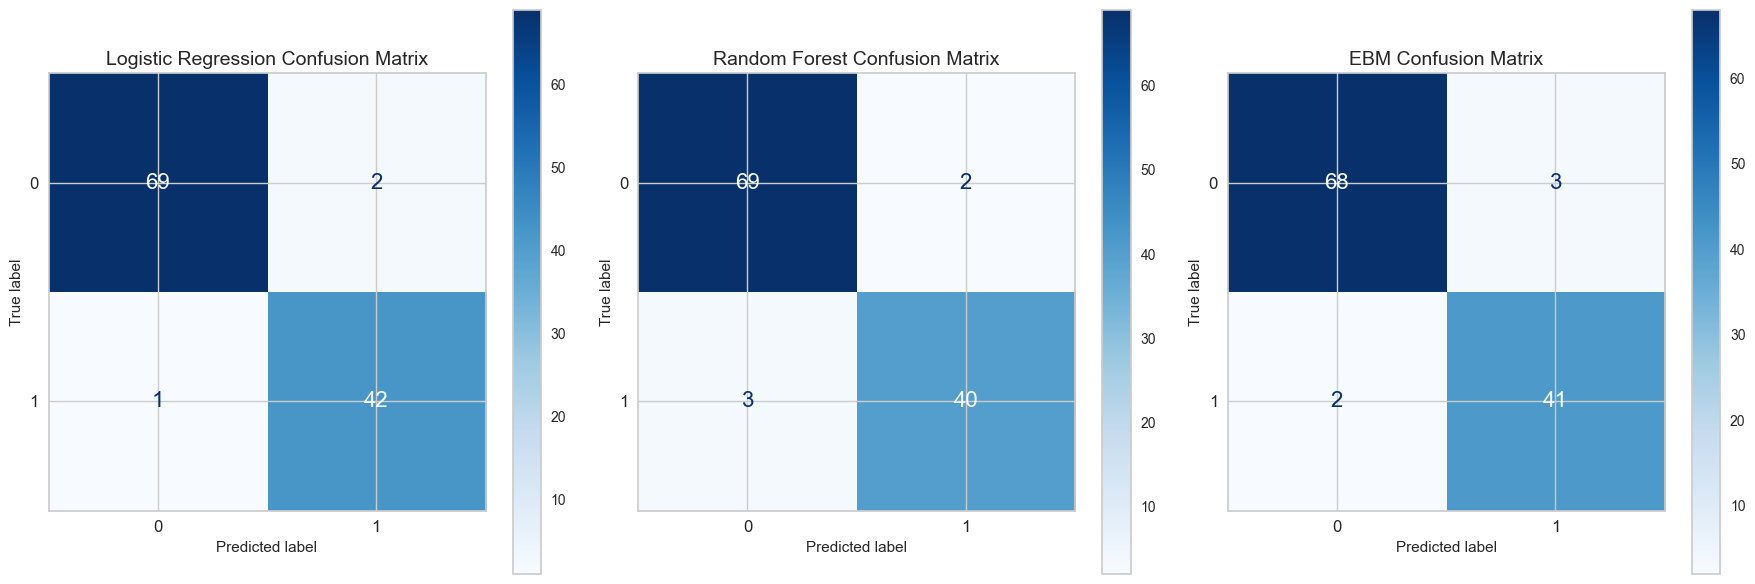

In [37]:

from matplotlib import pyplot as plt
from joblib import load
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Modelle laden
models = {
    "Logistic Regression": load('../models/lr_pipeline.pkl'),
    "Random Forest": load('../models/rf_pipeline.pkl'),
    "EBM": load('../models/ebm_pipeline.pkl')}

# Set up the figure for displaying confusion matrices in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Generate and plot confusion matrices
for ax, (model_name, model) in zip(axes, models.items()):
    # Predictions
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display Confusion Matrix with larger numbers
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', ax=ax, values_format='d')

    # Customize plot
    for text in disp.text_.ravel():  # Increase font size of the annotations
        text.set_fontsize(16)
    ax.set_title(f'{model_name} Confusion Matrix', fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

# Adjust layout
plt.tight_layout()
# Save the figure as an image
plt.savefig('../artifacts/confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()



# 3.4 Model interpretation

In [ ]:
# TODO Interprete Models (dt, rf, ebm) with SHAP

## 3.4.1 Logistic Regression Model

In [11]:
lr_pipeline = load('../models/lr_pipeline.pkl')

In [12]:
lr_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'smoothness_se',
                                                   'compactness_se'...
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'smoothness_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model',
                 LogisticRegression(C=0.8551700768068193, max_iter=500,
                                    penalty='l1', solver='saga'))])

In [90]:
# Load the dataset
file_path = '../../2_data_acquisition_understanding/data/processed/reduced_features.csv'
df = pd.read_csv(file_path)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Extract feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_pipeline.named_steps['model'].coef_[0]
})
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending =True)
print(feature_importance)


                    Feature  Coefficient  Abs_Coefficient
2           smoothness_mean     0.000000         0.000000
3          compactness_mean     0.000000         0.000000
5    fractal_dimension_mean     0.000000         0.000000
7                texture_se     0.000000         0.000000
9            compactness_se    -0.034459         0.034459
8             smoothness_se    -0.037698         0.037698
4             symmetry_mean    -0.158683         0.158683
16  fractal_dimension_worst     0.264038         0.264038
10             concavity_se     0.390100         0.390100
11        concave points_se     0.484909         0.484909
13     fractal_dimension_se    -0.819041         0.819041
12              symmetry_se    -1.044974         1.044974
1              texture_mean     1.354003         1.354003
14         smoothness_worst     1.419423         1.419423
15           symmetry_worst     1.913750         1.913750
6                 radius_se     2.275925         2.275925
0             

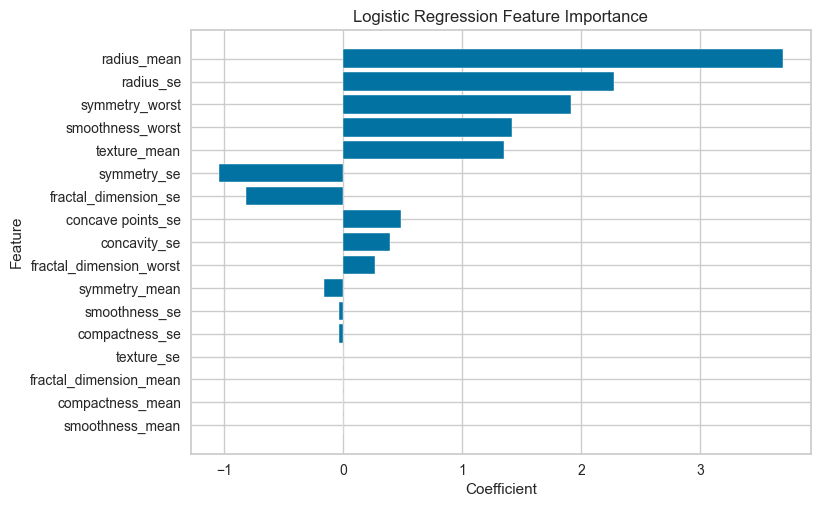

In [79]:
import matplotlib.pyplot as plt

plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.savefig('../artifacts/lr_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


In [43]:
import shap

# Extract the trained model from the pipeline
lr_model = lr_pipeline.named_steps['model']

# Preprocess the test data (use the pipeline's preprocessing step)
X_test_preprocessed = lr_pipeline.named_steps['preprocess'].transform(X_test)

# Initialize SHAP explainer
explainer = shap.LinearExplainer(lr_model, X_test_preprocessed)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_preprocessed)

plt.figure()
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)
plt.savefig('../artifacts/lr_shap_summary_plot.png', dpi=300, bbox_inches='tight')  # Save the plot as an image
plt.close()  # Close the figure to free memory


In [423]:
!pip install lime

In [104]:
from lime.lime_tabular import LimeTabularExplainer

# Preprocessed data for LIME
X_train_preprocessed = lr_pipeline.named_steps['preprocess'].transform(X_train)

# Create a LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train_preprocessed,
    feature_names=X_train.columns,
    class_names=['B', 'M'],  # Replace with your actual class names
    mode='classification'
)

# Explain a single prediction
i = 91  # Index of the test instance to explain

# Preprocessed instance for explanation
X_test_preprocessed = lr_pipeline.named_steps['preprocess'].transform(X_test)
lime_exp = lime_explainer.explain_instance(
    data_row=X_test_preprocessed[i],
    predict_fn=lr_pipeline.named_steps['model'].predict_proba
)

# Access the scaler from the ColumnTransformer
preprocessor = lr_pipeline.named_steps['preprocess']

# Find the specific transformer that scales your features
scaler = preprocessor.named_transformers_['numerical']  # Adjust 'numerical' if your pipeline uses a different name

# Back-transform feature values for interpretability
original_values = scaler.inverse_transform([X_test_preprocessed[i]])

# Map original values to feature names
print("Original feature values:")
for feature_name, original_value in zip(X_train.columns, original_values[0]):
    print(f"{feature_name}: {original_value}")

output_file = '../artifacts/lime_explanation_91_false.html'
lime_exp.save_to_file(output_file)
# Display explanation
lime_exp.show_in_notebook()




Original feature values:
radius_mean: 13.46
texture_mean: 18.75
smoothness_mean: 0.1075
compactness_mean: 0.1138
symmetry_mean: 0.1723
fractal_dimension_mean: 0.06317
radius_se: 0.1998
texture_se: 0.6068
smoothness_se: 0.004413
compactness_se: 0.01443
concavity_se: 0.01509
concave points_se: 0.007369
symmetry_se: 0.01354
fractal_dimension_se: 0.001787
smoothness_worst: 0.1624
symmetry_worst: 0.3518
fractal_dimension_worst: 0.08665


In [103]:
def get_index_position(dataframe, target_index):

    try:
        position = dataframe.index.get_loc(target_index)
        return position
    except KeyError:
        print(f"Index {target_index} does not exist in  DataFrame.")
        return None

# Beispiel:
x = 526  # Zielindex
position_x = get_index_position(X_test, x)
print(f"Position des Index {x}: {position_x}")



Position des Index 526: 91


In [93]:
print(X_test.index)



Int64Index([204,  70, 131, 431, 540, 567, 369,  29,  81, 477,
            ...
            549, 530, 163, 503, 148, 486,  75, 249, 238, 265],
           dtype='int64', length=114)


## 3.4.2 Random Forest

In [18]:
rf_pipeline = load('../models/rf_pipeline_no_pp.pkl')

In [14]:
# Load the dataset
file_path = '../../2_data_acquisition_understanding/data/processed/reduced_features.csv'
df = pd.read_csv(file_path)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_pipeline.named_steps['model'].feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance)


                    Feature  Importance
0               radius_mean    0.346081
6                 radius_se    0.123277
3          compactness_mean    0.092334
1              texture_mean    0.071949
10             concavity_se    0.067638
15           symmetry_worst    0.065087
14         smoothness_worst    0.059759
16  fractal_dimension_worst    0.031275
5    fractal_dimension_mean    0.024815
2           smoothness_mean    0.023779
11        concave points_se    0.020155
12              symmetry_se    0.018475
8             smoothness_se    0.014927
7                texture_se    0.011387
9            compactness_se    0.011095
4             symmetry_mean    0.009972
13     fractal_dimension_se    0.007995


In [ ]:
# Sort the DataFrame by Importance in descending order
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_pipeline.named_steps['model'].feature_importances_
}).sort_values('Importance', ascending=False)

# Plot the sorted feature importances
plt.figure(figsize=(10, 8))  # Optional: Adjust figure size
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.savefig('../artifacts/rf_feature_importance.png')
plt.show()


In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import display
import graphviz
import os

# Set a directory to save the tree visualization
output_dir = "tree_visualizations"
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Extract the Decision Tree model from the pipeline
dt_model = dt_pipeline.named_steps['model']

# Export the tree to DOT format
dot_data = export_graphviz(
    dt_model,
    feature_names=X_train.columns.tolist(),  # Feature names
    class_names=[str(cls) for cls in dt_model.classes_],  # Class names
    filled=True,  # Color nodes by class
    max_depth=5,  # Limit the depth of the tree for visualization
    impurity=False,  # Do not show impurity in nodes
    proportion=True,  # Show proportions of samples at each node
)

# Render the tree using graphviz
graph = graphviz.Source(dot_data)

# Save the graph to a file
output_file = os.path.join(output_dir, "dt_tree")
graph.render(output_file, format="png")  # Save as PNG
print(f"Saved tree visualization to {output_file}.png")

# Display the tree (optional)
display(graph)


In [113]:
#rf_model = rf_pipeline.named_steps['model']
dt_model = dt_pipeline.named_steps['model']

In [ ]:
# load dataset
file_path = '../../2_data_acquisition_understanding/data/processed/reduced_features.csv'
df = pd.read_csv(file_path)

df.head()

In [ ]:
!pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import display
import graphviz
import os

# Set a directory to save the tree visualizations
output_dir = "tree_visualizations"
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Extract the Random Forest model from the pipeline
rf_model = rf_pipeline.named_steps['model']

# Export and save the first three decision trees from the Random Forest
for i in range(3):  # Adjust the range if you want to save more or fewer trees
    tree = rf_model.estimators_[i]  # Access the i-th tree in the forest

    # Export the tree to DOT format
    dot_data = export_graphviz(
        tree,
        feature_names=X_train.columns.tolist(),  # Feature names
        class_names=[str(cls) for cls in rf_model.classes_],  # Class names
        filled=True,  # Color nodes by class
        max_depth=5,  # Limit the depth of the tree for visualization
        impurity=False,  # Do not show impurity in nodes
        proportion=True,  # Show proportions of samples at each node
    )

    # Render the tree using graphviz
    graph = graphviz.Source(dot_data)

    # Save the graph to a file
    output_file = ('../artifacts/rf_treed.png')
    graph.render(output_file, format="png")  # Save as PNG
    print(f"Saved tree {i} visualization to {output_file}.png")

    # Display the tree (optional)
    display(graph)


## 3.4.3 EBM

In [19]:
ebm = load('../models/best_ebm.pkl')

In [20]:
# Load the dataset
file_path = '../../2_data_acquisition_understanding/data/processed/reduced_features.csv'
df = pd.read_csv(file_path)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
show(ebm.explain_global())


     radius_mean  texture_mean  smoothness_mean  compactness_mean  \
204        12.47         18.60          0.09965           0.10580   
70         18.94         21.31          0.09009           0.10290   
131        15.46         19.48          0.10920           0.12230   
431        12.40         17.68          0.10540           0.13160   
540        11.54         14.44          0.09984           0.11200   
..           ...           ...              ...               ...   
486        14.64         16.85          0.08641           0.06698   
75         16.07         19.65          0.09168           0.08424   
249        11.52         14.93          0.10130           0.07808   
238        14.22         27.85          0.08223           0.10390   
265        20.73         31.12          0.09469           0.11430   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
204         0.1925                 0.06373     0.3961      1.0440   
70          0.1582               

In [23]:
from matplotlib.pyplot import show

show(ebm.explain_local(X_test[18:21], y_test[18:21]), 0)

# 3.5 Inspecting wrong predictions

In addition, a detailed error analysis is very important so that the business partners also understand the weaknesses of your approach.

In [25]:
# Define your models
models = {
    "lr": load('../models/lr_pipeline.pkl'),
    "rf": load('../models/rf_pipeline_no_pp.pkl'),
    "ebm": load('../models/best_ebm.pkl')
}

def get_misclassified_samples(model, model_name, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)

    # Identify misclassified samples
    misclassified_idx = y_test != y_pred
    misclassified_samples = X_test[misclassified_idx]
    true_labels = y_test[misclassified_idx]
    predicted_labels = y_pred[misclassified_idx]

    # Create a DataFrame for better analysis
    misclassified_df = pd.DataFrame(misclassified_samples, columns=X_test.columns)
    misclassified_df['True_Label'] = true_labels.values
    misclassified_df['Predicted_Label'] = predicted_labels
    misclassified_df['Sample_ID'] = misclassified_samples.index  # Add Sample ID for merging later

    return misclassified_df

# Extract misclassified samples for all models
lr_misclassified = get_misclassified_samples(models["lr"], "Logistic Regression", X_test, y_test)
rf_misclassified = get_misclassified_samples(models["rf"], "Random Forest", X_test, y_test)
ebm_misclassified = get_misclassified_samples(models["ebm"], "Explainable Boosting Machine", X_test, y_test)






In [26]:
# Merge the misclassified data from all models
combined_misclassified = pd.merge(
    lr_misclassified[['Sample_ID', 'True_Label', 'Predicted_Label']].rename(columns={"Predicted_Label": "LR_Predicted"}),
    rf_misclassified[['Sample_ID', 'Predicted_Label']].rename(columns={"Predicted_Label": "RF_Predicted"}),
    on='Sample_ID',
    how='outer'
).merge(
    ebm_misclassified[['Sample_ID', 'Predicted_Label']].rename(columns={"Predicted_Label": "EBM_Predicted"}),
    on='Sample_ID',
    how='outer'
)

# Replace NaN values with "right"
combined_misclassified = combined_misclassified.fillna("-")

# Replace 1 with "malignant" and 0 with "benign" in all relevant columns
combined_misclassified = combined_misclassified.replace({
    'True_Label': {1: "malignant", 0: "benign"},
    'LR_Predicted': {1: "malignant", 0: "benign"},
    'RF_Predicted': {1: "malignant", 0: "benign"},
    'EBM_Predicted': {1: "malignant", 0: "benign"}
})

# Save the combined table as a CSV file (optional)
combined_misclassified.to_csv("combined_misclassification_table.csv", index=False)

# Display the combined table
print(combined_misclassified)



   Sample_ID True_Label LR_Predicted RF_Predicted EBM_Predicted
0         73  malignant       benign       benign        benign
1        208     benign    malignant    malignant     malignant
2        526     benign    malignant            -     malignant
3         81          -            -    malignant     malignant
4         86          -            -       benign        benign
5        255          -            -            -        benign


In [27]:
sample = X_test.loc[73]
print("Details for Sample_ID 73:", sample)


Details for Sample_ID 73: radius_mean                13.800000
texture_mean               15.790000
smoothness_mean             0.100700
compactness_mean            0.128000
symmetry_mean               0.166200
fractal_dimension_mean      0.065660
radius_se                   0.278700
texture_se                  0.620500
smoothness_se               0.004717
compactness_se              0.020650
concavity_se                0.017590
concave points_se           0.009206
symmetry_se                 0.012200
fractal_dimension_se        0.003130
smoothness_worst            0.141100
symmetry_worst              0.258900
fractal_dimension_worst     0.103000
Name: 73, dtype: float64


In [29]:
# Additional Interpretability and Error Analysis Code


import pandas as pd
import matplotlib.pyplot as plt
import shap
from joblib import load
from sklearn.inspection import PartialDependenceDisplay
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

In [30]:

## 1. Load Best Performing Models

ebm = load('../models/best_ebm.pkl')  # Adjust if needed
lr_pipeline = load('../models/lr_pipeline.pkl')
rf_pipeline = load('../models/rf_pipeline_no_pp.pkl')

file_path = '../../2_data_acquisition_understanding/data/processed/reduced_features.csv'
df = pd.read_csv(file_path)
X = df.drop(columns=['diagnosis_binary'])
y = df['diagnosis_binary']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:

## 2. Use EBM's Global Explanation to Show Feature Importances
# The EBM model provides a global explanation on how each feature contributes.

from interpret import show

global_explanation = ebm.explain_global()
print("Global Feature Importances (EBM):")
for i, feat in enumerate(global_explanation.data()['names']):
    print(f"{feat}: {global_explanation.data()['scores'][i]}")

# Display EBM global explanation in a browser window (if running locally)
show(global_explanation)

Global Feature Importances (EBM):
radius_mean: 1.5763862345866329
texture_mean: 1.0422363279435904
smoothness_mean: 0.5127408787992968
compactness_mean: 0.5871158025040608
symmetry_mean: 0.33417873758356303
fractal_dimension_mean: 0.34743917162183613
radius_se: 0.9718367341661828
texture_se: 0.28243663662450796
smoothness_se: 0.22545008211914902
compactness_se: 0.18744660251919035
concavity_se: 0.5587106351130543
concave points_se: 0.3973383698022298
symmetry_se: 0.5241551251980672
fractal_dimension_se: 0.26866797982734125
smoothness_worst: 0.6524034729843093
symmetry_worst: 0.7236026645174284
fractal_dimension_worst: 0.3714419952735724
radius_mean & texture_mean: 0.31420275254694374
radius_mean & compactness_mean: 0.1888753362888746
radius_mean & radius_se: 0.1873592918373249
radius_mean & smoothness_se: 0.19929494953237217
radius_mean & smoothness_worst: 0.26396198850689473
radius_mean & symmetry_worst: 0.2634610199898932
texture_mean & symmetry_se: 0.21942739931790306
compactness_me

<!-- http://127.0.0.1:7001/2608856102032/ -->

Top 3 features by importance: ['radius_mean', 'texture_mean', 'radius_se']


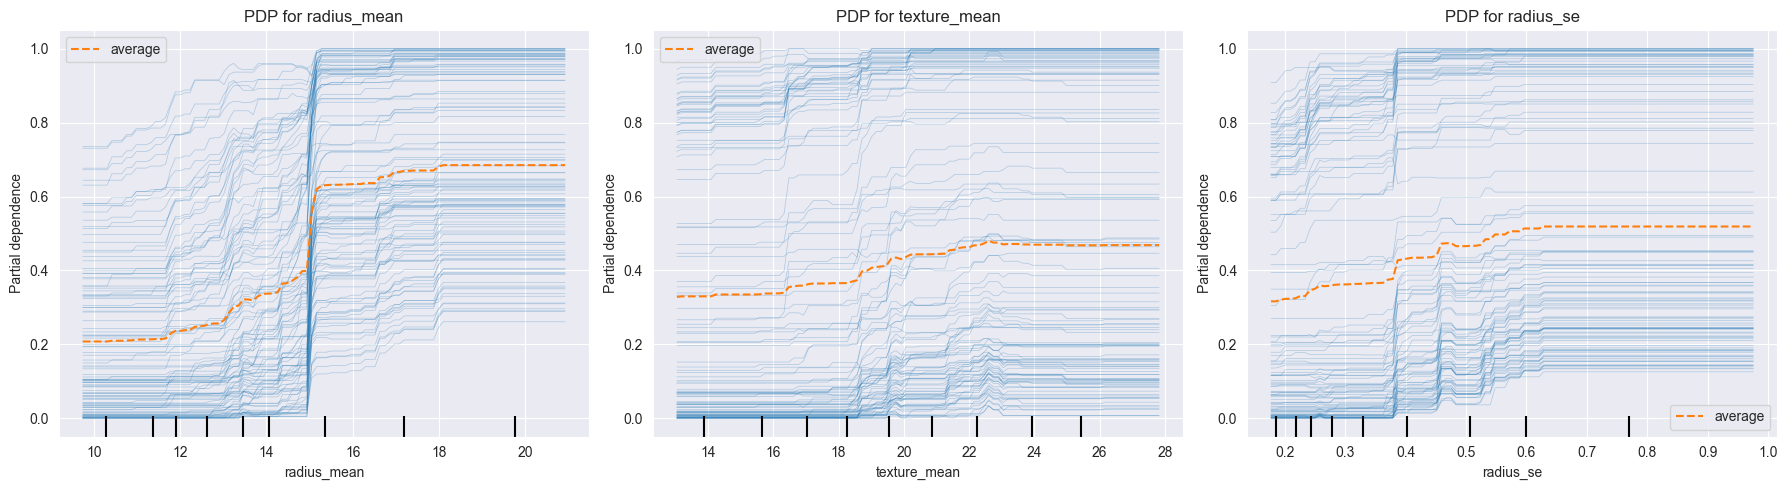

In [33]:

## 3. Partial Dependence Plots (PDP) for Key Features
# Let's pick the top 3 most important features from the EBM model and plot partial dependence to illustrate
# how changes in these features affect model predictions.

# Identify top 3 features from EBM global explanation
feature_scores = list(zip(global_explanation.data()['names'], global_explanation.data()['scores']))
feature_scores_sorted = sorted(feature_scores, key=lambda x: x[1], reverse=True)  # Sort by importance descending
top_features = [f for f, s in feature_scores_sorted[:3]]

print("Top 3 features by importance:", top_features)

# For PDPs on LR and RF (as examples), we need preprocessed data if LR was trained with a pipeline.
# For EBM, it can handle raw data directly, but PDP from sklearn is model-agnostic if we have predict_proba.
# We'll show PDP on the Random Forest model since it's widely understood and can also strengthen trust.

# Convert categorical if needed and ensure correct data format
# Here we assume X is numeric or properly encoded. If not, adapt accordingly.

# Plot PDP for the Random Forest model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feat in enumerate(top_features):
    PartialDependenceDisplay.from_estimator(
        rf_pipeline.named_steps['model'],
        X_test,
        [feat],
        ax=axes[i],
        kind='both'  # both PDP and ICE
    )
    axes[i].set_title(f'PDP for {feat}')
plt.tight_layout()
plt.savefig('../artifacts/pdp_top_features_rf.png', dpi=300, bbox_inches='tight')
plt.show()


In [34]:

## 4. Local Explanations for Misclassified Instances
# We previously created a table of misclassified samples. Let's pick one misclassified sample from the EBM model
# and try to explain it locally using LIME or SHAP. This helps stakeholders understand model weaknesses.

# If not already defined, here's how to get misclassified samples again:

def get_misclassified_samples(model, X_test, y_test):
    y_pred = model.predict(X_test)
    misclassified_idx = (y_test != y_pred)
    misclassified_samples = X_test[misclassified_idx]
    true_labels = y_test[misclassified_idx]
    predicted_labels = y_pred[misclassified_idx]

    misclassified_df = pd.DataFrame(misclassified_samples, columns=X_test.columns)
    misclassified_df['True_Label'] = true_labels.values
    misclassified_df['Predicted_Label'] = predicted_labels
    misclassified_df['Sample_ID'] = misclassified_samples.index
    return misclassified_df


ebm_misclassified = get_misclassified_samples(ebm, X_test, y_test)

if len(ebm_misclassified) > 0:
    # Choose a random misclassified sample for demonstration
    sample_id = ebm_misclassified['Sample_ID'].iloc[0]
    print(f"Selected misclassified sample ID: {sample_id}")
    sample_data = X_test.loc[sample_id:sample_id]

    # Local Explanation with LIME for EBM
    # Since EBM is not a pipeline here, it takes raw input. We'll provide predict_proba function directly.
    lime_explainer_ebm = LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=X_train.columns,
        class_names=['benign', 'malignant'],  # Adjust based on target encoding
        mode='classification'
    )

    lime_exp_ebm = lime_explainer_ebm.explain_instance(
        data_row=sample_data.values[0],
        predict_fn=ebm.predict_proba
    )

    # Save LIME explanation to HTML (for distribution to stakeholders)
    lime_output_file = '../artifacts/lime_explanation_ebm_misclassified.html'
    lime_exp_ebm.save_to_file(lime_output_file)
    print(f"LIME explanation saved to {lime_output_file}")

Selected misclassified sample ID: 81
LIME explanation saved to ../artifacts/lime_explanation_ebm_misclassified.html


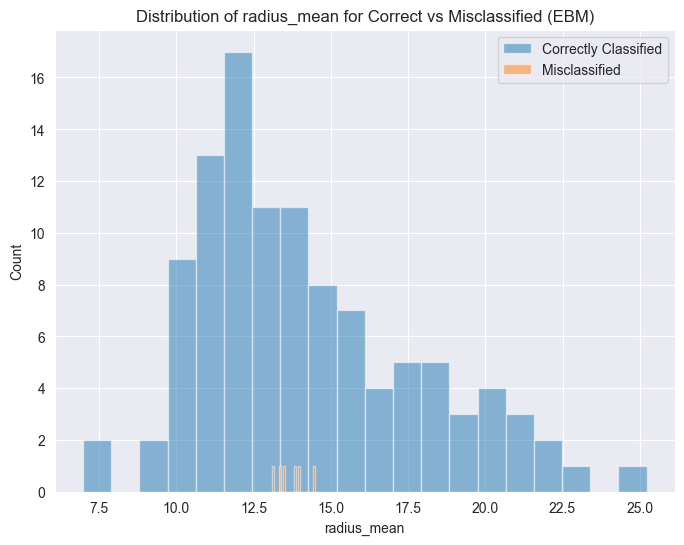

In [35]:

## 5. Visualizing Errors in Relation to Key Features
# Let's plot how the misclassified samples differ on a key feature compared to correctly classified samples.

if len(ebm_misclassified) > 0:
    # Just take one of the top features and show distribution
    top_feature = top_features[0]
    fig, ax = plt.subplots(figsize=(8, 6))

    # Correctly classified samples
    ebm_correct_idx = (y_test == ebm.predict(X_test))
    ebm_correct_samples = X_test[ebm_correct_idx]

    # Plot distributions
    ax.hist(ebm_correct_samples[top_feature], bins=20, alpha=0.5, label='Correctly Classified')
    ax.hist(ebm_misclassified[top_feature], bins=20, alpha=0.5, label='Misclassified')
    ax.set_xlabel(top_feature)
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of {top_feature} for Correct vs Misclassified (EBM)')
    ax.legend()
    plt.savefig('../artifacts/feature_distribution_misclassified.png', dpi=300, bbox_inches='tight')
    plt.show()